In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
q = pd.read_csv('chestionar11.csv')

In [3]:
qdn = pd.read_csv('chestionardn.csv')

In [4]:
q.columns

Index(['ID', 'a_zile', 'b_minute', 'c_zile', 'd_minute', 'e_zile', 'f_minute',
       'g_minute', 'ab_ore', 'cd_ore', 'ef_ore', 'g_ore'],
      dtype='object')

In [5]:
q.apply(lambda x: x.unique())

ID          [c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11,...
a_zile                               [0, 2, 3, 6, 1, 4, 7, 5]
b_minute     [0.0, 30.0, 120.0, nan, 40.0, 60.0, 180.0, 50.0]
c_zile                                           [1, 2, 3, 4]
d_minute           [20.0, 30.0, 60.0, 120.0, nan, 40.0, 50.0]
e_zile                               [1, 2, 4, 6, 5, 0, 3, 7]
f_minute                    [30, 10, 40, 60, 120, 180, 0, 50]
g_minute             [480.0, 360.0, nan, 240.0, 300.0, 420.0]
ab_ore      [0.0, 1.0, 1.5, 12.0, nan, 0.5, 2.666666667, 2...
cd_ore      [0.333333333, 0.5, 1.0, 2.0, nan, 3.0, 4.0, 6....
ef_ore      [0.5, 0.166666667, 0.666666667, 2.0, 8.0, 4.0,...
g_ore                          [8.0, 6.0, nan, 4.0, 5.0, 7.0]
dtype: object

In [6]:
q.apply(lambda x: len(x.unique()))

ID          40
a_zile       8
b_minute     8
c_zile       4
d_minute     7
e_zile       8
f_minute     8
g_minute     6
ab_ore      16
cd_ore      11
ef_ore      16
g_ore        6
dtype: int64

In [7]:
vcountss = q.apply(lambda x: x.value_counts(dropna = False).sort_index(), result_type = 'reduce')[1:]
vcountss.index

Index(['a_zile', 'b_minute', 'c_zile', 'd_minute', 'e_zile', 'f_minute',
       'g_minute', 'ab_ore', 'cd_ore', 'ef_ore', 'g_ore'],
      dtype='object')

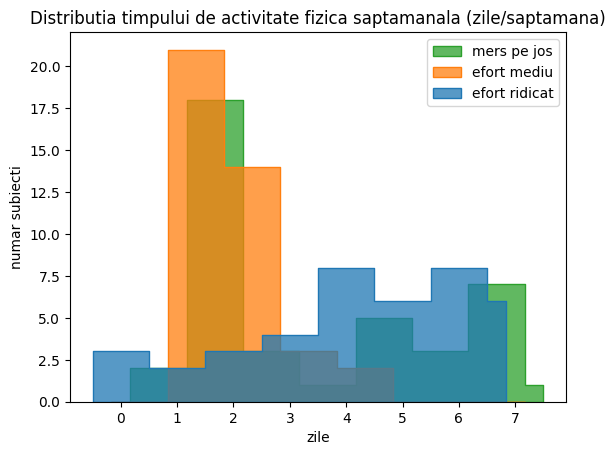

In [8]:
sns.histplot(data = q.loc[:,['a_zile', 'c_zile', 'e_zile']], discrete = True, stat = 'count', multiple="dodge", element = 'step')
plt.xlabel('zile')
plt.ylabel('numar subiecti')
plt.legend(labels=['mers pe jos', 'efort mediu', 'efort ridicat'])
plt.title('Distributia timpului de activitate fizica saptamanala (zile/saptamana)')
plt.savefig('distzile.pdf')
plt.savefig('distzile.svg')

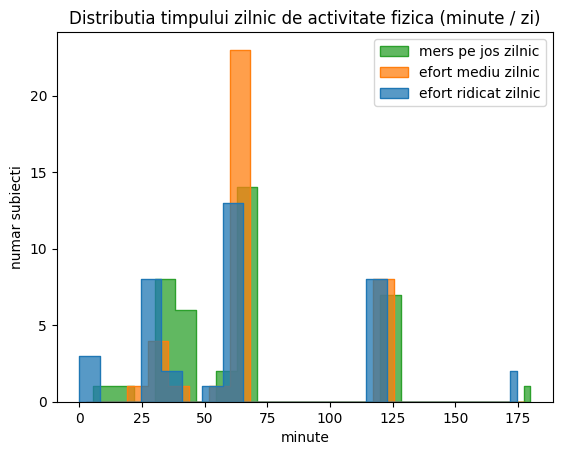

In [9]:
sns.histplot(data = q.loc[:,['b_minute', 'd_minute', 'f_minute']], stat = 'count', multiple="dodge", element='step')
plt.xlabel('minute')
plt.ylabel('numar subiecti')
plt.legend(labels=['mers pe jos zilnic', 'efort mediu zilnic', 'efort ridicat zilnic'])
plt.title('Distributia timpului zilnic de activitate fizica (minute / zi)')
plt.savefig('dist-minute.pdf')
plt.savefig('dist-minute.svg')

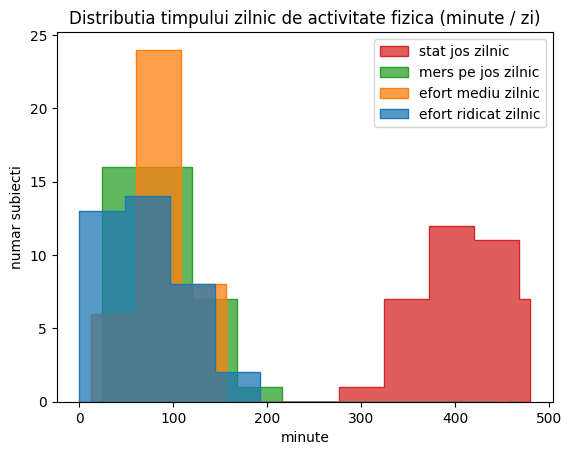

In [10]:
sns.histplot(data = q.loc[:,['b_minute', 'd_minute', 'f_minute', 'g_minute']], stat = 'count', multiple="dodge", element='step')
plt.xlabel('minute')
plt.ylabel('numar subiecti')
plt.legend(labels=['stat jos zilnic', 'mers pe jos zilnic', 'efort mediu zilnic', 'efort ridicat zilnic'])
plt.title('Distributia timpului zilnic de activitate fizica (minute / zi)')
plt.savefig('dist-minute-sed.pdf')
plt.savefig('dist-minute-sed.svg')

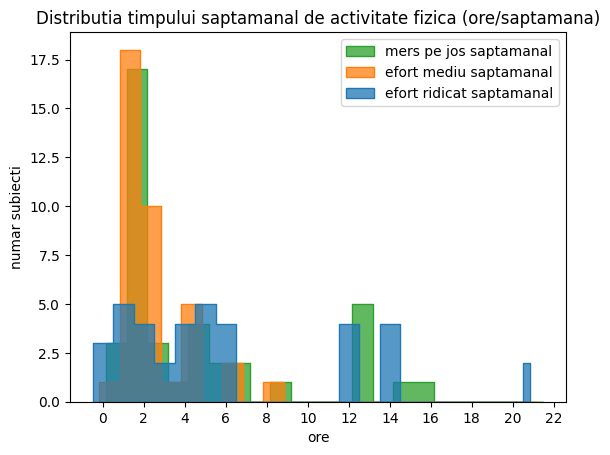

In [11]:
sns.histplot(data = q.loc[:,['ab_ore', 'cd_ore', 'ef_ore']], stat = 'count', discrete = True, multiple='dodge', element='step')
plt.xticks(np.arange(0,23,2))
plt.xlabel('ore')
plt.ylabel('numar subiecti')
plt.legend(labels=['mers pe jos saptamanal', 'efort mediu saptamanal', 'efort ridicat saptamanal'])
plt.title('Distributia timpului saptamanal de activitate fizica (ore/saptamana)')
plt.savefig('dist-ore.pdf')
plt.savefig('dist-ore.svg')

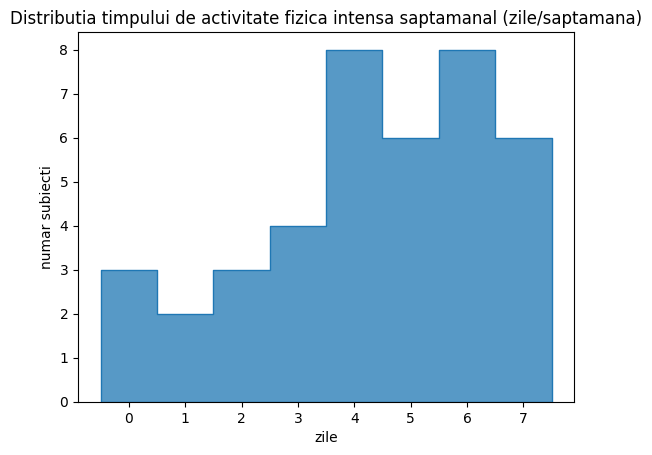

In [12]:
sns.histplot(data = q.loc[:,'a_zile'], discrete = True, stat = 'count', multiple="dodge", element = 'step')
plt.xlabel('zile')
plt.ylabel('numar subiecti')
#plt.legend(labels=['mers pe jos', 'efort mediu', 'efort ridicat'])
plt.title('Distributia timpului de activitate fizica intensa saptamanal (zile/saptamana)')
plt.savefig('zile-intens.pdf')
plt.savefig('zile-intens.svg')

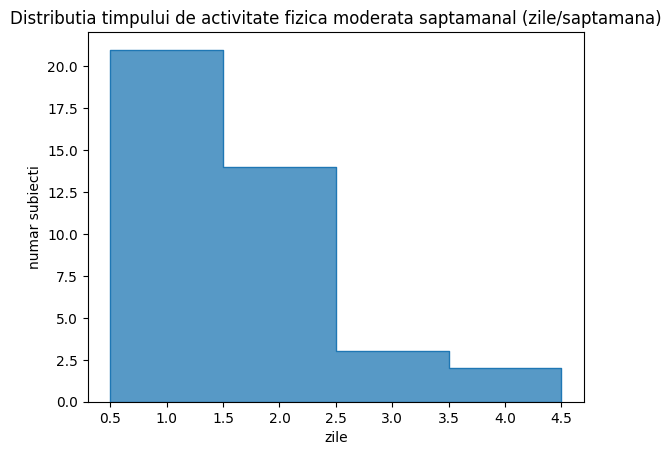

In [13]:
sns.histplot(data = q.loc[:,'c_zile'], discrete = True, stat = 'count', multiple="dodge", element = 'step')
plt.xlabel('zile')
plt.ylabel('numar subiecti')
#plt.legend(labels=['mers pe jos', 'efort mediu', 'efort ridicat'])
plt.title('Distributia timpului de activitate fizica moderata saptamanal (zile/saptamana)')
plt.savefig('zile-moderat.pdf')
plt.savefig('zile-moderat.svg')

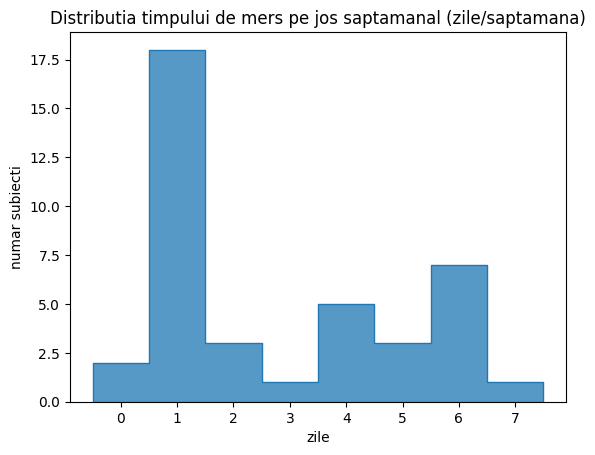

In [14]:
sns.histplot(data = q.loc[:,'e_zile'], discrete = True, stat = 'count', multiple="dodge", element = 'step')
plt.xlabel('zile')
plt.ylabel('numar subiecti')
#plt.legend(labels=['mers pe jos', 'efort mediu', 'efort ridicat'])
plt.title('Distributia timpului de mers pe jos saptamanal (zile/saptamana)')
plt.savefig('zile-mers.pdf')
plt.savefig('zile-mers.svg')

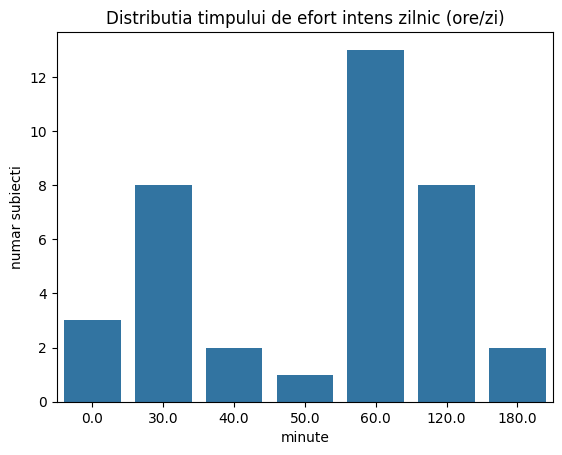

In [15]:
sns.barplot(vcountss['b_minute'])
plt.xlabel('minute')
plt.ylabel('numar subiecti')
#plt.legend(labels=['mers pe jos', 'efort mediu', 'efort ridicat'])
plt.title('Distributia timpului de efort intens zilnic (ore/zi)')
plt.savefig('intens-zilnic.pdf')
plt.savefig('intens-zilnic.svg')

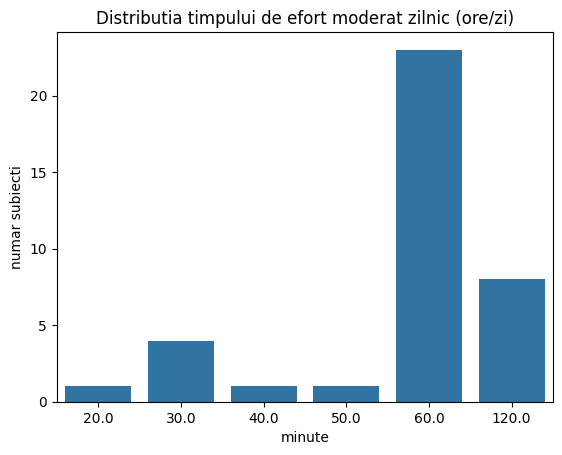

In [16]:
sns.barplot(vcountss['d_minute'])
plt.xlabel('minute')
plt.ylabel('numar subiecti')
#plt.legend(labels=['mers pe jos', 'efort mediu', 'efort ridicat'])
plt.title('Distributia timpului de efort moderat zilnic (ore/zi)')
plt.savefig('moderat-zilnic.pdf')
plt.savefig('moderat-zilnic.svg')

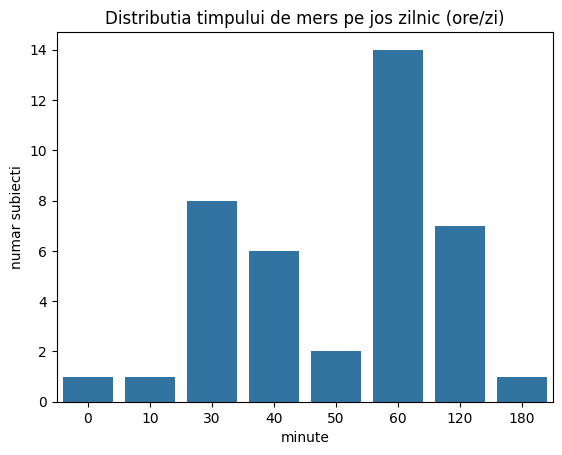

In [17]:
sns.barplot(vcountss['f_minute'])
plt.xlabel('minute')
plt.ylabel('numar subiecti')
#plt.legend(labels=['mers pe jos', 'efort mediu', 'efort ridicat'])
plt.title('Distributia timpului de mers pe jos zilnic (ore/zi)')
plt.savefig('mers-zilnic.pdf')
plt.savefig('mers-zilnic.svg')

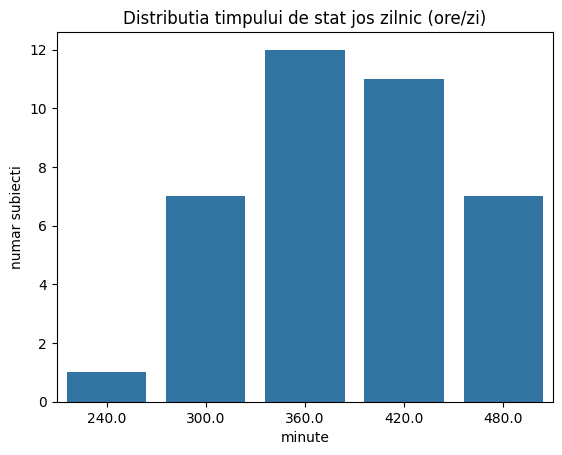

In [18]:
sns.barplot(vcountss['g_minute'])
plt.xlabel('minute')
plt.ylabel('numar subiecti')
#plt.legend(labels=['mers pe jos', 'efort mediu', 'efort ridicat'])
plt.title('Distributia timpului de stat jos zilnic (ore/zi)')
plt.savefig('stat-zilnic.pdf')
plt.savefig('stat-zilnic.svg')

In [19]:
vcountss['cd_ore'].iloc[:-1].astype(int).values

array([ 1,  4,  1, 12,  1, 10,  1,  5,  2,  1])

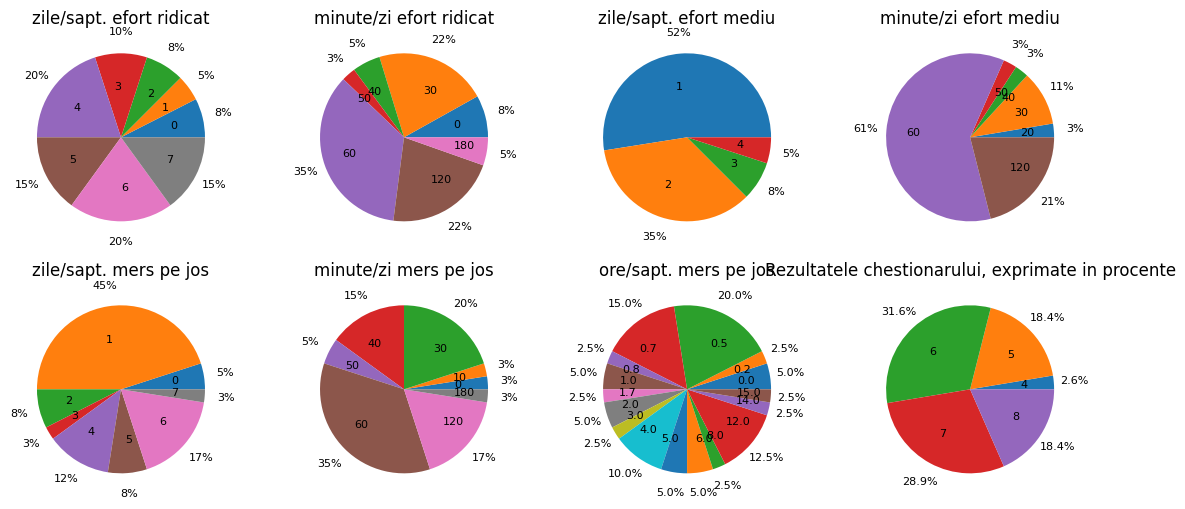

In [20]:
fig, ax = plt.subplots(2,4, figsize= (14,6))
ax[0,0].pie(vcountss['a_zile'], labels=vcountss['a_zile'].index, autopct='%1.f%%', textprops={'fontsize': 8}, pctdistance=1.25, labeldistance=.6)
ax[0,0].set_title("zile/sapt. efort ridicat")
ax[0,1].pie(vcountss['b_minute'].iloc[:-1], labels=vcountss['b_minute'].iloc[:-1].index.astype(int), autopct='%1.f%%', textprops={'fontsize': 8}, pctdistance=1.25, labeldistance=.6)
ax[0,1].set_title("minute/zi efort ridicat")
ax[0,2].pie(vcountss['c_zile'], labels=vcountss['c_zile'].index, autopct='%1.f%%', textprops={'fontsize': 8}, pctdistance=1.25, labeldistance=.6)
ax[0,2].set_title("zile/sapt. efort mediu")
ax[0,3].pie(vcountss['d_minute'].iloc[:-1], labels=vcountss['d_minute'].iloc[:-1].index.astype(int), autopct='%1.f%%', textprops={'fontsize': 8}, pctdistance=1.25, labeldistance=.6)
ax[0,3].set_title("minute/zi efort mediu")
ax[1,0].pie(vcountss['e_zile'], labels=vcountss['e_zile'].index, autopct='%1.f%%', textprops={'fontsize': 8}, pctdistance=1.25, labeldistance=.6)
ax[1,0].set_title("zile/sapt. mers pe jos")
ax[1,1].pie(vcountss['f_minute'], labels=vcountss['f_minute'].index, autopct='%1.f%%', textprops={'fontsize': 8}, pctdistance=1.25, labeldistance=.6)
ax[1,1].set_title("minute/zi mers pe jos")
# ax[1,2].pie(vcountss['g_minute'].iloc[:-1].astype(int), labels=vcountss['g_minute'].iloc[:-1].index.astype(int), autopct='%1.f%%', textprops={'fontsize': 8}, pctdistance=1.25, labeldistance=.6)
# ax[1,2].set_title("minute/zi stat jos")
# ax[1,3].pie(vcountss['ab_ore'], labels = vcountss['ab_ore'].index.round(1), autopct='%1.1f%%', textprops={'fontsize': 8}, pctdistance=1.25, labeldistance=.6)
# ax[1,3].set_title("ore/sapt. efort ridicat")
# ax[2,0].pie(vcountss['cd_ore'], labels = vcountss['cd_ore'].index.round(1), autopct='%1.1f%%', textprops={'fontsize': 8}, pctdistance=1.25, labeldistance=.6)
# ax[2,0].set_title("ore/sapt. efort mediu")
ax[1,2].pie(vcountss['ef_ore'], labels = vcountss['ef_ore'].index.round(1), autopct='%1.1f%%', textprops={'fontsize': 8}, pctdistance=1.25, labeldistance=.6)
ax[1,2].set_title("ore/sapt. mers pe jos")
ax[1,3].pie(vcountss['g_ore'].iloc[:-1], labels=vcountss['g_ore'].iloc[:-1].index.astype(int), autopct='%1.1f%%', textprops={'fontsize': 8}, pctdistance=1.25, labeldistance=.6)
ax[1,3].set_title("ore/zi. stat jos")
plt.title('Rezultatele chestionarului, exprimate in procente')
plt.savefig('pieplots.pdf')
plt.savefig('pieplots.svg')
plt.show()

In [21]:
qdn.corr(numeric_only = True)

,a_zile,b_minute,c_zile,d_minute,e_zile,f_minute,g_minute,ab_ore,cd_ore,ef_ore,g_ore
a_zile,1.000000,0.826591,0.680279,0.538283,0.673376,0.461200,0.004762,0.823255,0.605553,0.508439,0.004762
b_minute,0.826591,1.000000,0.714863,0.508607,0.575076,0.279411,0.231338,0.982764,0.670519,0.319117,0.231338
c_zile,0.680279,0.714863,1.000000,0.476974,0.699852,0.315704,0.173094,0.746413,0.852601,0.494873,0.173094
d_minute,0.538283,0.508607,0.476974,1.000000,0.245660,0.003837,0.132009,0.486191,0.817018,0.053092,0.132009
e_zile,0.673376,0.575076,0.699852,0.245660,1.000000,0.772751,-0.069578,0.595170,0.470612,0.894230,-0.069578
f_minute,0.461200,0.279411,0.315704,0.003837,0.772751,1.000000,-0.268723,0.247304,0.077229,0.938555,-0.268723
g_minute,0.004762,0.231338,0.173094,0.132009,-0.069578,-0.268723,1.000000,0.302190,0.242167,-0.239224,1.000000
ab_ore,0.823255,0.982764,0.746413,0.486191,0.595170,0.247304,0.302190,1.000000,0.687837,0.318332,0.302190
cd_ore,0.605553,0.670519,0.852601,0.817018,0.470612,0.077229,0.242167,0.687837,1.000000,0.232625,0.242167
ef_ore,0.508439,0.319117,0.494873,0.053092,0.894230,0.938555,-0.239224,0.318332,0.232625,1.000000,-0.239224


In [22]:
q.loc[:,['a_zile', 'c_zile', 'e_zile']].corr().style.background_gradient(cmap='RdYlGn')

,a_zile,c_zile,e_zile
a_zile,1.000000,0.679865,0.665004
c_zile,0.679865,1.000000,0.728404
e_zile,0.665004,0.728404,1.000000


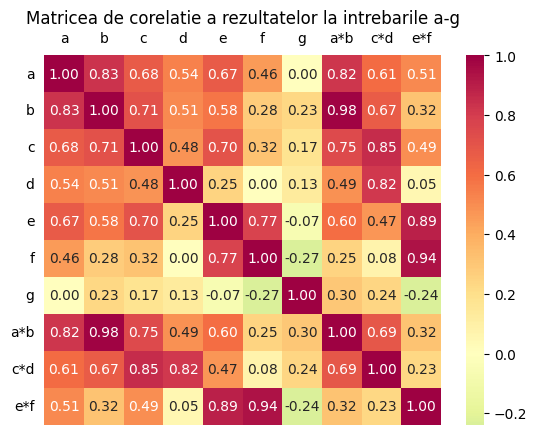

In [23]:
sns.heatmap(qdn.iloc[:,1:-1].corr(numeric_only = True), robust = True, center = 0, annot=True, fmt='.2f', cmap = 'Spectral_r',
           xticklabels=['a', 'b', 'c', 'd', 'e','f','g','a*b','c*d','e*f'], yticklabels=['a', 'b', 'c', 'd', 'e','f','g','a*b','c*d','e*f'])
plt.tick_params(labeltop = True, labelbottom=False, bottom = False, left = False)
plt.yticks(rotation = 0)
plt.title('Matricea de corelatie a rezultatelor la intrebarile a-g')
plt.savefig('corelograma.pdf')
plt.savefig('corelograma.svg')
plt.show()

In [24]:
descr = qdn.iloc[:,1:].agg(['count', 'median', 'mean', 'min', 'max', 'std', 'var'])
descr.index = ['N', 'mediana', 'media', 'valoarea minima', 'valoarea maxima', 'deviatia standard', 'varianta']
descr.columns = ['zile efort intens/saptamana', 'minute efort intens/zi', 'zile efort moderat/saptamana', 
                 'minute efort moderat/zi', 'zile mers pe jos/saptamana', 'minute mers pe jos/zi', 
                'minute stat jos/zi', 'ore efort intens/samptamana', 'ore efort moderat/saptamana', 
                'ore mers pe jos/saptamana', 'ore stat jos/saptamana']
descr = descr.round(2).T
descr.to_csv('descr.csv')
descr

,N,mediana,media,valoarea minima,valoarea maxima,deviatia standard,varianta
zile efort intens/saptamana,35.0,5.0,4.40,0.00,7.0,2.21,4.89
minute efort intens/zi,35.0,60.0,68.00,0.00,180.0,46.45,2157.65
zile efort moderat/saptamana,35.0,2.0,1.74,1.00,4.0,0.85,0.73
minute efort moderat/zi,35.0,60.0,68.29,20.00,120.0,30.73,944.03
zile mers pe jos/saptamana,35.0,2.0,3.06,0.00,7.0,2.20,4.82
minute mers pe jos/zi,35.0,60.0,64.29,0.00,180.0,39.20,1536.97
minute stat jos/zi,35.0,360.0,384.00,240.00,480.0,67.00,4489.41
ore efort intens/samptamana,35.0,5.0,6.36,0.00,21.0,5.88,34.54
ore efort moderat/saptamana,35.0,2.0,2.19,0.33,8.0,1.80,3.25
ore mers pe jos/saptamana,35.0,2.0,4.35,0.00,15.0,4.71,22.17


C:\Users\THW\AppData\Local\Temp\ipykernel_11648\912671734.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(qdn.loc[:,['a_zile', 'c_zile', 'e_zile']], estimator = 'mean', errorbar='se').set(xticklabels = ['efort intens', 'efort moderat', 'mers pe jos'])


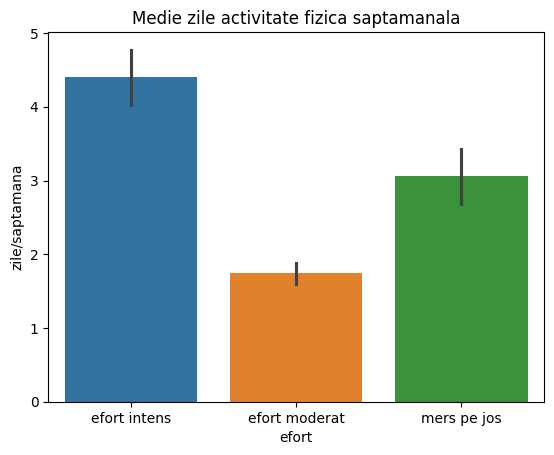

In [25]:
sns.barplot(qdn.loc[:,['a_zile', 'c_zile', 'e_zile']], estimator = 'mean', errorbar='se').set(xticklabels = ['efort intens', 'efort moderat', 'mers pe jos'])
plt.xlabel('efort')
plt.ylabel('zile/saptamana')
plt.title('Medie zile activitate fizica saptamanala')
plt.savefig('medie-zile.pdf')
plt.savefig('medie-zile.svg')
plt.show()

C:\Users\THW\AppData\Local\Temp\ipykernel_11648\3524921757.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(qdn.loc[:,['b_minute', 'd_minute', 'f_minute']], estimator = 'mean', errorbar='se').set(xticklabels = ['efort intens', 'efort moderat', 'mers pe jos'])


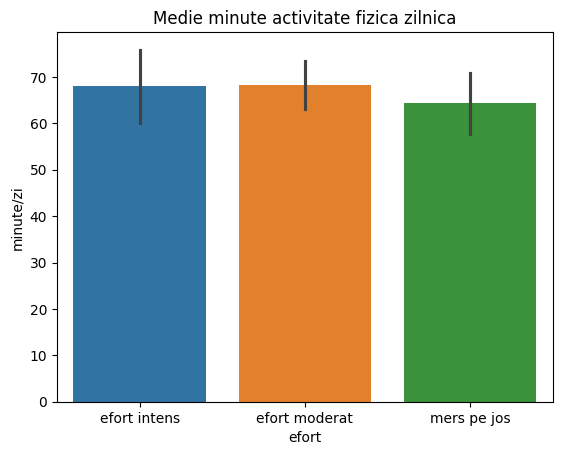

In [26]:
sns.barplot(qdn.loc[:,['b_minute', 'd_minute', 'f_minute']], estimator = 'mean', errorbar='se').set(xticklabels = ['efort intens', 'efort moderat', 'mers pe jos'])
plt.xlabel('efort')
plt.ylabel('minute/zi')
plt.title('Medie minute activitate fizica zilnica')
plt.savefig('medie-minute.pdf')
plt.savefig('medie-minute.svg')

C:\Users\THW\AppData\Local\Temp\ipykernel_11648\2396851234.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(qdn.loc[:,['ab_ore', 'cd_ore', 'ef_ore']], estimator = 'mean', errorbar='se').set(xticklabels = ['efort intens', 'efort moderat', 'mers pe jos'])


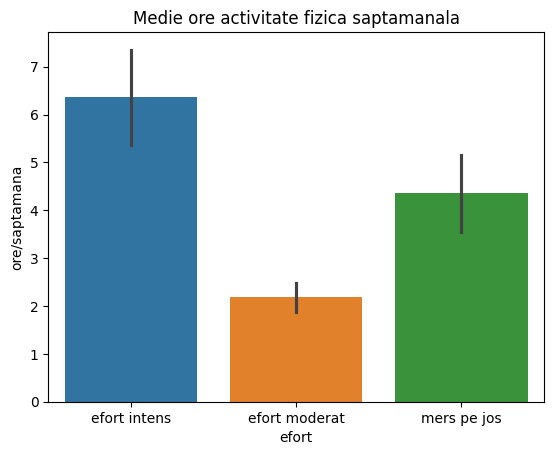

In [27]:
sns.barplot(qdn.loc[:,['ab_ore', 'cd_ore', 'ef_ore']], estimator = 'mean', errorbar='se').set(xticklabels = ['efort intens', 'efort moderat', 'mers pe jos'])
plt.xlabel('efort')
plt.ylabel('ore/saptamana')
plt.title('Medie ore activitate fizica saptamanala')
plt.savefig('medie-ore.pdf')
plt.savefig('medie-ore.svg')